<a href="https://colab.research.google.com/github/vicentemf/Mercado-Financeiro/blob/main/SGS_BANCO_CENTRAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A idéia desta rotina é exemplificar como é possível extrair dados das bases das séries históricas mantidas pelo Banco Central possibilitando a geração de possíveis consultas pelo investidor pessoa física afim de compreender melhor a economia do país . 

In [586]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

In [587]:
#parâmetros gerais para os gráficos
plt.rcParams['figure.figsize'] = (11,7) 
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['figure.titlesize']  = 10

 #Abaixo irei extrair os dados da Taxa de juros-SELIC  , o saldo de depósitos a prazo de pessoa física e  o IGP-M . 
 #É possivel fazer um loop para extrair estes dados de uma só vez,entretanto,seguirei o caminho do "passo- a passo" afim de ser mais claro para o leitor.

In [588]:
selic = 1178 #codigo da série histórica requerida(disponível na SGS do Banco Central)

In [589]:
url =f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{selic}/dados?formato=json'

In [590]:
selic = pd.read_json(url)

In [591]:
selic

,data,valor
0,04/06/1986,17.80
1,05/06/1986,18.50
2,06/06/1986,18.31
3,09/06/1986,18.76
4,10/06/1986,18.40
...,...,...
9035,22/06/2022,13.15
9036,23/06/2022,13.15
9037,24/06/2022,13.15
9038,27/06/2022,13.15


In [592]:
selic.dtypes

data      object
valor    float64
dtype: object

 #Para entender melhor os dados,vou transformar a coluna data em "datetime" e transformá-la no índice do meu DataFrame . 
 #Nos próximos Dataframes serão feitos procedimentos similares .

In [593]:
selic['data'] = pd.to_datetime(selic['data'], dayfirst=True)
selic.set_index('data', inplace=True)


In [594]:
selic

,valor
data,
1986-06-04,17.80
1986-06-05,18.50
1986-06-06,18.31
1986-06-09,18.76
1986-06-10,18.40
...,...
2022-06-22,13.15
2022-06-23,13.15
2022-06-24,13.15


In [595]:
data_inicio = '2021-06-29'

In [596]:
selic_filtrada =selic[selic.index>=data_inicio]

In [597]:
selic_filtrada

,valor
data,
2021-06-29,4.15
2021-06-30,4.15
2021-07-01,4.15
2021-07-02,4.15
2021-07-05,4.15
...,...
2022-06-22,13.15
2022-06-23,13.15
2022-06-24,13.15


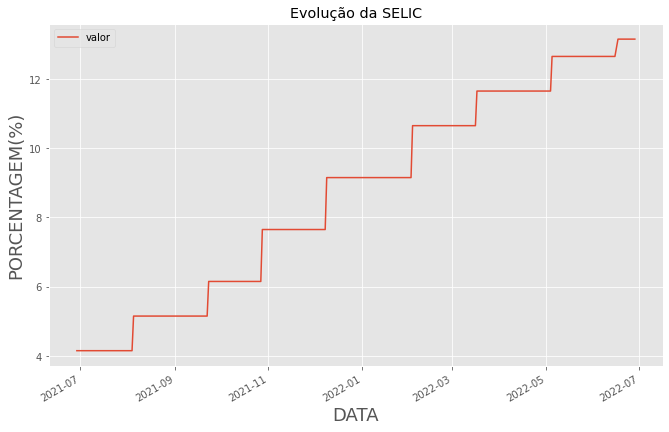

In [598]:
selic_filtrada.plot();
plt.title('Evolução da SELIC')
plt.xlabel('DATA')
plt.ylabel('PORCENTAGEM(%)');

In [599]:
saldo_pf = 33

In [600]:
url2 =f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{saldo_pf}/dados?formato=json'

In [601]:
saldo_pf = pd.read_json(url2)

In [602]:
saldo_pf,saldo_pf.dtypes

(            data         valor
 0     28/02/1992  7.993828e+09
 1     04/03/1992  8.076000e+09
 2     05/03/1992  8.276263e+09
 3     06/03/1992  8.421809e+09
 4     09/03/1992  8.772395e+09
 ...          ...           ...
 7551  08/04/2022  7.818628e+06
 7552  11/04/2022  7.665720e+06
 7553  12/04/2022  7.646010e+06
 7554  13/04/2022  7.616266e+06
 7555  14/04/2022  7.593700e+06
 
 [7556 rows x 2 columns], data      object
 valor    float64
 dtype: object)

In [603]:
saldo_pf['data']=pd.to_datetime(saldo_pf['data'],dayfirst=True)
saldo_pf.set_index('data',inplace=True)

In [604]:
saldo_pf_filtrado = saldo_pf[saldo_pf.index >=data_inicio]

In [605]:
saldo_pf_filtrado

,valor
data,
2021-06-29,4357287.87
2021-06-30,4372509.40
2021-07-01,4378579.50
2021-07-02,4381806.63
2021-07-05,4386923.31
...,...
2022-04-08,7818628.00
2022-04-11,7665720.31
2022-04-12,7646009.78


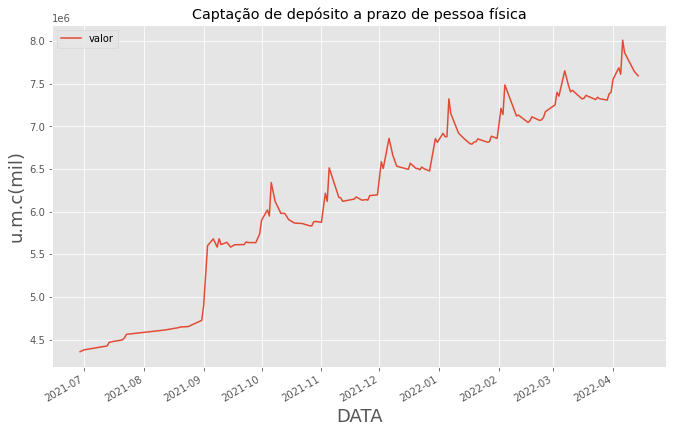

In [606]:
saldo_pf_filtrado.plot();
plt.title('Captação de depósito a prazo de pessoa física')
plt.xlabel('DATA')
plt.ylabel('u.m.c(mil)');

In [607]:
igpm = 189

In [608]:
url3 =f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{igpm}/dados?formato=json'

In [609]:
igpm= pd.read_json(url3)

In [610]:
igpm,igpm.dtypes

(           data  valor
 0    01/06/1989  19.68
 1    01/07/1989  35.90
 2    01/08/1989  36.92
 3    01/09/1989  39.92
 4    01/10/1989  40.64
 ..          ...    ...
 392  01/02/2022   1.83
 393  01/03/2022   1.74
 394  01/04/2022   1.41
 395  01/05/2022   0.52
 396  01/06/2022   0.59
 
 [397 rows x 2 columns], data      object
 valor    float64
 dtype: object)

In [611]:
igpm['data'] = pd.to_datetime(igpm['data'],dayfirst=True)
igpm.set_index('data',inplace = True)
igpm_filtrado =igpm[igpm.index >=data_inicio]

In [612]:
igpm_filtrado

,valor
data,
2021-07-01,0.78
2021-08-01,0.66
2021-09-01,-0.64
2021-10-01,0.64
2021-11-01,0.02
2021-12-01,0.87
2022-01-01,1.82
2022-02-01,1.83
2022-03-01,1.74


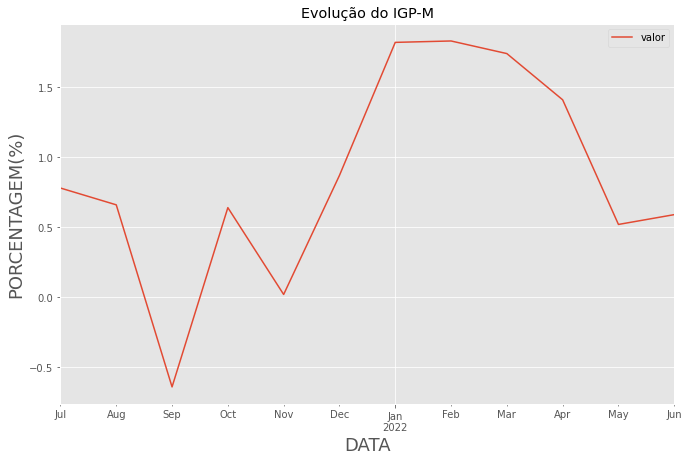

In [613]:
igpm_filtrado.plot();
plt.title('Evolução do IGP-M')
plt.xlabel('DATA')
plt.ylabel('PORCENTAGEM(%)');